In [ ]:
# Install required libraries if not already installed
!pip install tensorflow

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

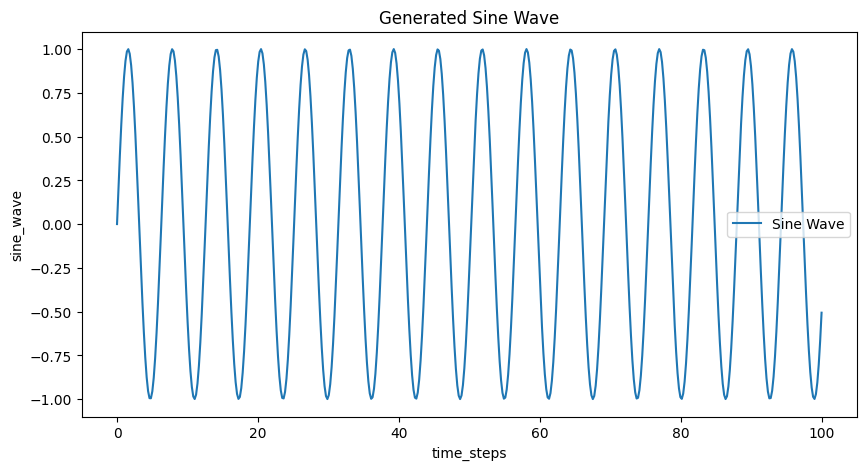

In [ ]:


# Generate sine wave data
time_steps = np.linspace(0, 100, 500)
sine_wave = np.sin(time_steps)

# Visualize the sine wave
plt.figure(figsize=(10, 5))
plt.plot(time_steps, sine_wave, label="Sine Wave")
plt.title("Generated Sine Wave")
plt.xlabel("time_steps")
plt.ylabel("sine_wave")
plt.legend()
plt.show()


In [ ]:
# Prepare data for RNN
sequence_length = 10  # length of input sequences
X = []
y = []
for i in range(len(sine_wave) - sequence_length):
    X.append(sine_wave[i:i + sequence_length])
    y.append(sine_wave[i + sequence_length])
X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)


In [ ]:

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)



Training Data Shape: (392, 10, 1)
Testing Data Shape: (98, 10, 1)


In [ ]:

# Build Simple RNN model
model = Sequential([
    SimpleRNN(20, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1005 - val_loss: 0.0184
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - val_loss: 0.0069
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - val_loss: 0.0041
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 9.3593e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9146e-04 - val_loss: 5.9682e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2131e-04 - val_loss: 4.7344e-04
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5473e-04 - val_loss: 4.3993e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2944e-04 - val_loss: 4.2023e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9483e-04 - val_loss: 4.1908e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8875e-04 - val_loss: 3.7634e-04
Epoch 12/20
13/13 ━━━

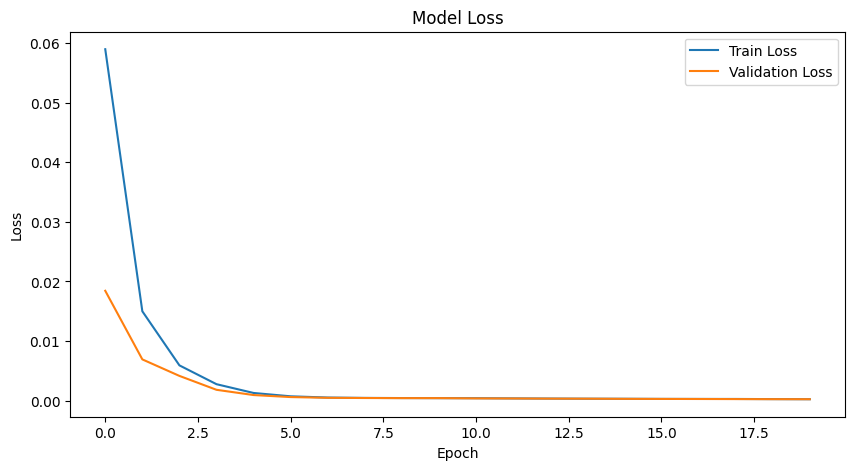

In [ ]:


# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:

# Make predictions
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


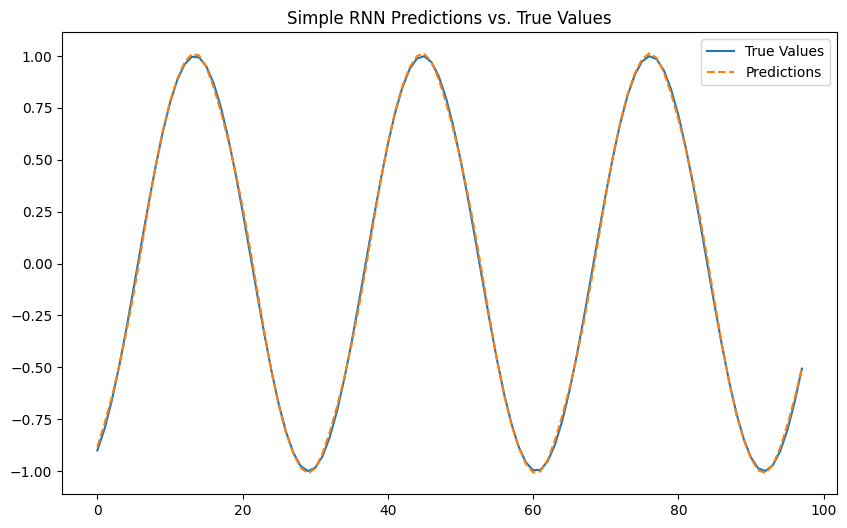

In [ ]:





# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True Values")
plt.plot(y_pred, label="Predictions", linestyle="dashed")
plt.title("Simple RNN Predictions vs. True Values")
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3834e-04 
Test Loss: 0.00023789462284184992


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


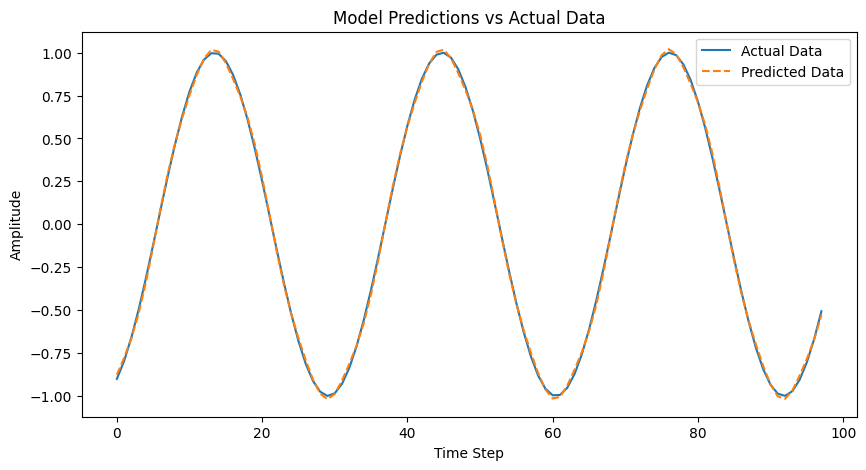

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Generate predictions
predictions = model.predict(X_test)

# Plot the predictions against actual data
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Data")
plt.plot(predictions.flatten(), label="Predicted Data", linestyle="--")
plt.title("Model Predictions vs Actual Data")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.legend()
plt.show()